# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload file

In [3]:
from google.colab import files
uploaded = files.upload()

Saving df_scaled.csv to df_scaled.csv


# Load the dataset

In [4]:
df = pd.read_csv('df_scaled.csv')
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Outlet_No.
0,10107222.0,Batticaloa,-0.347692,-0.308787,0.520598,1,1
1,10149531.0,Batticaloa,-0.347612,-0.211738,0.784676,1,1
2,10389466.0,Batticaloa,-0.347496,-0.367402,0.423406,1,1
3,10596077.0,Batticaloa,-0.347496,-0.271276,0.682146,1,1
4,10244123.0,Batticaloa,-0.347398,-0.301495,0.633288,1,1


In [5]:
df['cluster_catgeory'].value_counts()

,count
cluster_catgeory,
1,188982
4,172439
6,169215
2,155064
3,48907
5,39540


# Define X and Y variables

In [6]:
x = df[['luxury_sales','fresh_sales','dry_sales','Outlet_No.']]
y = df['cluster_catgeory']

# Independent variables

In [7]:
x

,luxury_sales,fresh_sales,dry_sales,Outlet_No.
0,-0.347692,-0.308787,0.520598,1
1,-0.347612,-0.211738,0.784676,1
2,-0.347496,-0.367402,0.423406,1
3,-0.347496,-0.271276,0.682146,1
4,-0.347398,-0.301495,0.633288,1
...,...,...,...,...
774142,0.212166,-0.399838,0.645924,20
774143,0.212166,-0.440558,0.607649,20
774144,-0.713610,0.402667,-0.415914,20
774145,0.941435,-0.230859,1.127004,20


# Dependant variables

In [8]:
y

,cluster_catgeory
0,1
1,1
2,1
3,1
4,1
...,...
774142,4
774143,4
774144,2
774145,4


# Split the dataset into train and test (75/25)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
df.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0
Outlet_No.,0


# Gradient boosting clasifier

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [12]:
y_pred = gbc.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9994


# Evaluate the model

In [14]:
#check the accuracy on train itself
y_pred_train = gbc.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on training data: {accuracy_train:.4f}")

Accuracy on training data: 0.9996


In [15]:
# plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# Classication report

In [16]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     47182
           2       1.00      1.00      1.00     38676
           3       1.00      1.00      1.00     12337
           4       1.00      1.00      1.00     43244
           5       1.00      1.00      1.00      9796
           6       1.00      1.00      1.00     42302

    accuracy                           1.00    193537
   macro avg       1.00      1.00      1.00    193537
weighted avg       1.00      1.00      1.00    193537



# Confusion matrix

<Axes: >

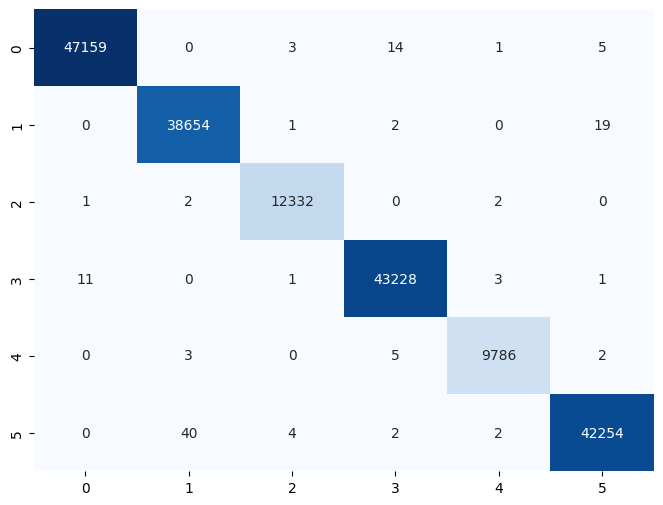

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Feature importance

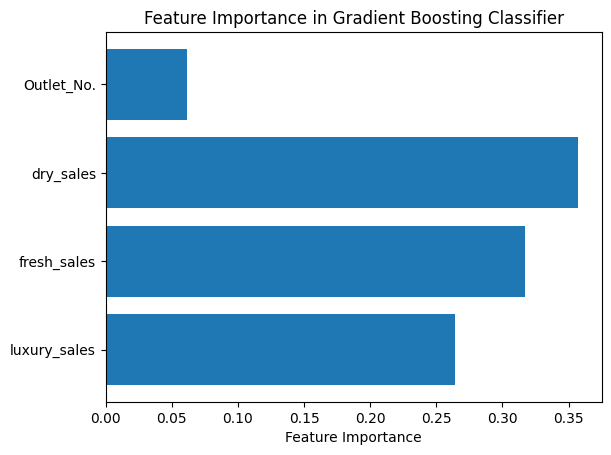

In [18]:
feature_importance = gbc.feature_importances_

# Get feature names from the columns used for training
feature_names = x_train.columns

plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.show()

# Loss curve

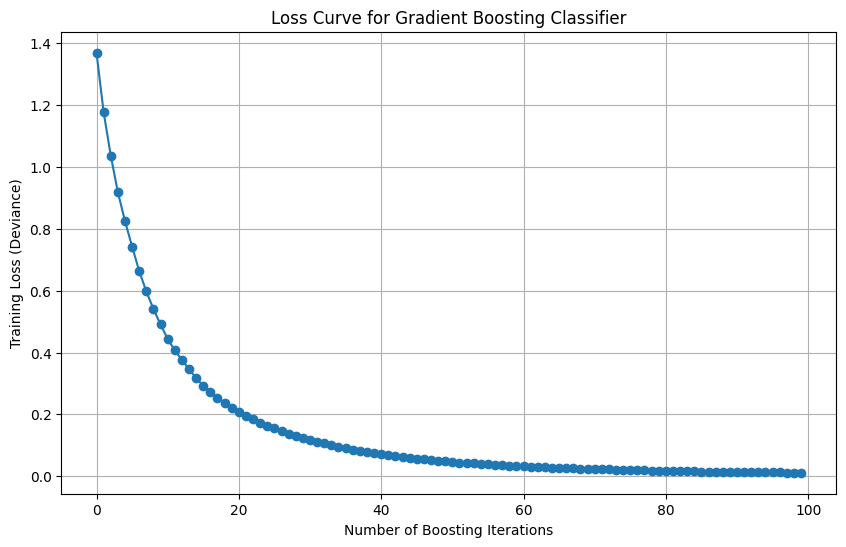

In [19]:
# Get the staged losses (deviance)
staged_losses = gbc.train_score_


# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(staged_losses, marker='o')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Training Loss (Deviance)')
plt.title('Loss Curve for Gradient Boosting Classifier')
plt.grid(True)
plt.show()